## Observations and Insights 

# Linear regression analysis (weight of mouse vs tumor vol)
We are trying to determine if there is any correlation between the mouse weight & the tumor volume.Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. Our Correlation Coefficient is 0.8.It  means 64% of the variance is related (.8 squared = .64). It means there is 64% chance that the data is co-related.

# Time series chart ( timepoints vs tumor volume for mice treated with Capomulin ) 
As per problem statement, we selected a random mouse sample & plotted its tumor volume plot as per time. The results are quite encouraging, as we see a substantial decrease in tumor size. Ideally we should plot tumor volume plots of all mouse treated with Capomulin & observe if this drug can cure the tumors

# Tumor size and drugs analysis
From the box plot, we observe that there are 2 kind of drugs being tested. Capomulin & Ramicane are used to test for tumors < 50mm3 while Infubinol & Ceftamin are treating tumors < 70 mm3

In [3]:
# Dependencies and Setup
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statistics as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
Combined_data.to_csv("Total.csv")

# Display the data table for preview
Combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [150]:
# Checking the number of mice.
num_mouse = len(Combined_data["Mouse ID"])
num_mouse

1893

In [151]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Combined_data.duplicated(subset=["Mouse ID","Timepoint"]).sum()

5

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 

Duplicate_Data = Combined_data.loc[Combined_data[["Mouse ID","Timepoint"]].duplicated(keep="first"),:]
Duplicate_ID = Duplicate_Data["Mouse ID"]
print(Duplicate_ID)
Duplicate_Data

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Reference:https://www.youtube.com/watch?v=ht5buXUMqkQ&feature=youtu.be
Clean_df = Combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"])   
Clean_df                        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [155]:
# Checking the number of mice in the clean DataFrame.
num_mouse_clean_dataset = len(Clean_df)
num_mouse_clean_dataset

1888

## Summary Statistics

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

Regimen_data = Clean_df.groupby(["Drug Regimen"])

Mean = Regimen_data["Tumor Volume (mm3)"].mean()
Median = Regimen_data["Tumor Volume (mm3)"].median()
std_dev = Regimen_data["Tumor Volume (mm3)"].std(ddof=0)
variance = Regimen_data["Tumor Volume (mm3)"].var(ddof=0)
std_error_of_mean = Regimen_data["Tumor Volume (mm3)"].sem()

Regimen_dict = {"Mean":Mean,"Median":Median,"SD":std_dev,"VAR":variance,"sem":std_error_of_mean}

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Regimen_df = pd.DataFrame(Regimen_dict)
Regimen_df

,Mean,Median,SD,VAR,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.983904,24.839296,0.329346
Ceftamin,52.591172,51.776157,6.250556,39.069446,0.469821
Infubinol,52.884795,51.820584,6.548770,42.886388,0.492236
Ketapril,55.235638,53.698743,8.257659,68.188930,0.603860
Naftisol,54.331565,52.509285,8.112811,65.817708,0.596466
Placebo,54.033581,52.288934,7.799368,60.830138,0.581331
Propriva,52.393463,50.909965,6.546928,42.862273,0.525862
Ramicane,40.216745,40.673236,4.835669,23.383692,0.320955
Stelasyn,54.233149,52.431737,7.689090,59.122106,0.573111


In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Regimen_dict = {"Mean":Mean,"Median":Median,"Standard Deviation":std_dev,"Variance":variance,"SEM":std_error_of_mean}

Regimen_df = pd.DataFrame(Regimen_dict)
Regimen_df

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.983904,24.839296,0.329346
Ceftamin,52.591172,51.776157,6.250556,39.069446,0.469821
Infubinol,52.884795,51.820584,6.548770,42.886388,0.492236
Ketapril,55.235638,53.698743,8.257659,68.188930,0.603860
Naftisol,54.331565,52.509285,8.112811,65.817708,0.596466
Placebo,54.033581,52.288934,7.799368,60.830138,0.581331
Propriva,52.393463,50.909965,6.546928,42.862273,0.525862
Ramicane,40.216745,40.673236,4.835669,23.383692,0.320955
Stelasyn,54.233149,52.431737,7.689090,59.122106,0.573111


## Bar and Pie Charts

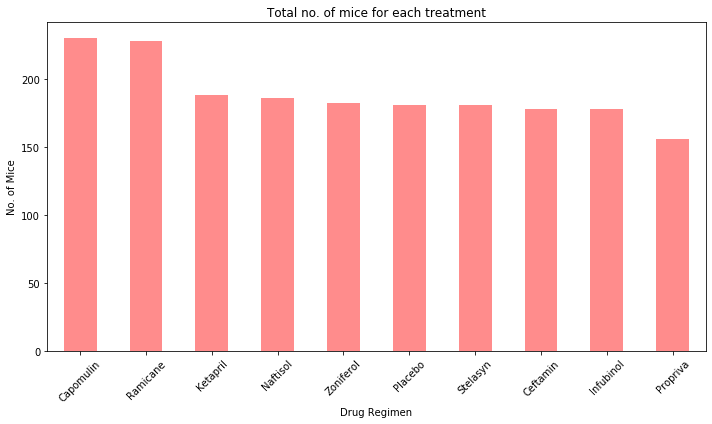

<Figure size 432x288 with 0 Axes>

In [160]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_count_per_drug = Clean_df["Drug Regimen"].value_counts()
mice_count_per_drug.plot(kind="bar",figsize=(10,6),title="Total no. of mice for each treatment",color="red",alpha=0.45,rot=45)
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mice")
plt.tight_layout()
plt.show(block=True)
plt.savefig("bar_chart.jpeg")

<Figure size 720x432 with 0 Axes>

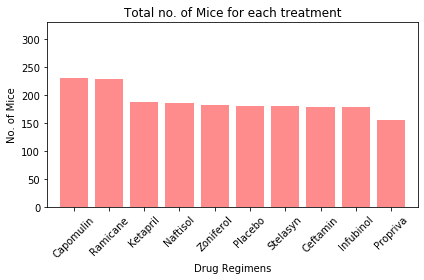

<Figure size 720x432 with 0 Axes>

In [162]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_count_per_drug = mice_count_per_drug.reset_index()
mice_count_per_drug.rename(columns={"Drug Regimen":"No.of Mice used","index":"Drug Regimen"},inplace=True)
x_axis = mice_count_per_drug["Drug Regimen"]
y_axis = mice_count_per_drug["No.of Mice used"]
plt.bar(x_axis,y_axis,align="center",alpha=0.45,color="red")
plt.xticks(rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(y_axis)+100)
plt.xlabel("Drug Regimens")
plt.ylabel("No. of Mice")
plt.title("Total no. of Mice for each treatment")
plt.tight_layout()
plt.figure(figsize=(10,6))

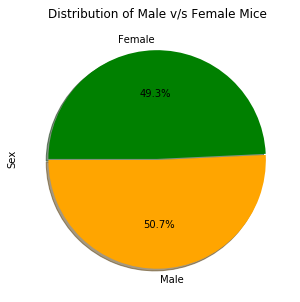

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Gender = Clean_df["Sex"].value_counts()
Gender_df = pd.DataFrame(Gender)
Gender_df.reset_index(inplace=True)
Num = list(Gender_df["Sex"])
colors=["orange","green"]
Gender.plot(kind="pie",y='Num', figsize=(5, 5),colors=colors,autopct="%1.1f%%",startangle=180,title="Distribution of Male v/s Female Mice",explode=(0.01,0),shadow=True)


(-1.100267757565328,
 1.1056229088722718,
 -1.1137625353144107,
 1.106742358008707)

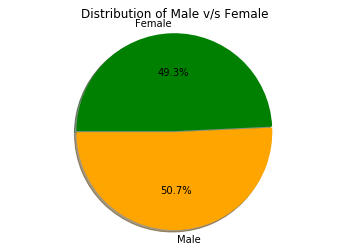

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender = Clean_df["Sex"].value_counts()
Gender_df = pd.DataFrame(Gender)
Gender_df.reset_index(inplace=True)
Num = list(Gender_df["Sex"])
labels = list(Clean_df["Sex"].unique())
plt.pie(Num,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,explode=(0.01,0),startangle=180,)
plt.title("Distribution of Male v/s Female")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [188]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# To solve this, we take the Dataframe, & then do the following:
# 0. Filter rows with each individual drug name --> call it DF1
# 1. Group rows by MouseID
# 2. Take row with maximum timepoint & make DF out of it --> call it DF2
# 3. Do Left Inner join (DF2, DF1) on columns (MouseID, timepoint)
# to get the rest of the data with final tumor volume per mice
Dict={}
Drug_List = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
for drug in Drug_List :
    drug_df = Clean_df.loc[Clean_df["Drug Regimen"]==drug] # Locate each individual drug regimen
    groupby_df = drug_df.groupby(["Mouse ID"]) # Group it by mouseID
    Timepoint = groupby_df["Timepoint"].max()
    df = pd.DataFrame(Timepoint)
    Dict[drug] = pd.merge(df,drug_df,how = "left",on=("Mouse ID","Timepoint"))

Capomulin_df = pd.DataFrame(Dict["Capomulin"])
Ramicane_df = pd.DataFrame(Dict["Ramicane"])
Infubinol_df = pd.DataFrame(Dict["Infubinol"])
Ceftamin_df = pd.DataFrame(Dict["Ceftamin"])

Capomulin_df.head(5)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [189]:
Ramicane_df.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [190]:
Infubinol_df.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [191]:
Ceftamin_df.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [198]:
# Put treatments into a list for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
Total_Tumors = []
for drug in Drug_List:
    df = Dict[drug] # each drug regimen's data
    tumor_vol = df["Tumor Volume (mm3)"]
    Total_Tumors.append(tumor_vol)
    # Calculation of mathematical formulas for finding outliers
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3-Q1
    Lower_Bound = Q1-(1.5*IQR)
    Upper_Bound = Q3 +(1.5*IQR)
    outliers = df.loc[(tumor_vol < Lower_Bound) | ( tumor_vol> Upper_Bound) ]
    print("********************")
    print(f"outliers for {drug} can be in the range {Lower_Bound} and {Upper_Bound}." )
    if len(outliers.index) == 0:
        print("No Outliers")
    else:
        print(outliers)
    print("********************")
# Total_Tumors    

********************
outliers for Capomulin can be in the range 20.70456164999999 and 51.83201549.
No Outliers
********************
********************
outliers for Ramicane can be in the range 17.912664470000003 and 54.30681135.
No Outliers
********************
********************
outliers for Infubinol can be in the range 36.83290494999999 and 82.74144559000001.
  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
5     c326          5    Infubinol  Female          18          25   

   Tumor Volume (mm3)  Metastatic Sites  
5           36.321346                 0  
********************
********************
outliers for Ceftamin can be in the range 25.355449580000002 and 87.66645829999999.
No Outliers
********************


Text(0, 0.5, 'Final Tumor vol of each mouse ')

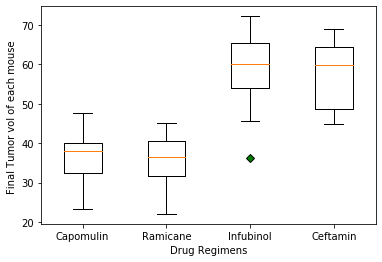

In [199]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axis = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
axis.boxplot(Total_Tumors, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=green_diamond)
axis.set_xlabel("Drug Regimens")
axis.set_ylabel("Final Tumor vol of each mouse ")

## Line and Scatter Plots

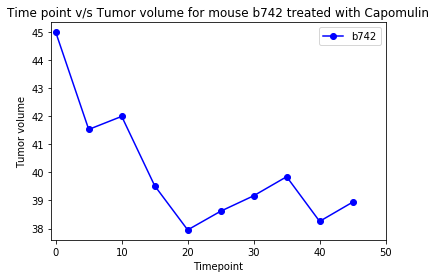

In [204]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Mouse = Clean_df.loc[(Clean_df["Drug Regimen"]=="Capomulin" ) & (Clean_df["Mouse ID"]=="b742" )] # MouseID randomly chosen
x_axis = Mouse["Timepoint"]
y_axis = Mouse["Tumor Volume (mm3)"]
Handle, = plt.plot(x_axis,y_axis,color="blue",marker="o",label="b742")
plt.xlabel("Timepoint")
plt.ylabel("Tumor volume")
plt.xlim(-0.75,max(x_axis)+5)
plt.title("Time point v/s Tumor volume for mouse b742 treated with Capomulin")
plt.legend()


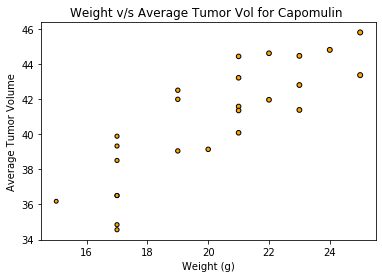

In [201]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Scatter_df = Clean_df.loc[(Clean_df["Drug Regimen"]=="Capomulin" )]
Scatter_groupby = Scatter_df.groupby(["Mouse ID"]).mean()
x_axis = Scatter_groupby["Weight (g)"]
y_axis = Scatter_groupby["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis,edgecolor="black",facecolor="orange",s=x_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Weight v/s Average Tumor Vol for Capomulin ")
plt.show()

## Correlation and Regression

In [202]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f"The correlation between both factors is {correlation}")

The correlation between both factors is 0.84


Text(0.5, 1.0, 'Linear regression model')

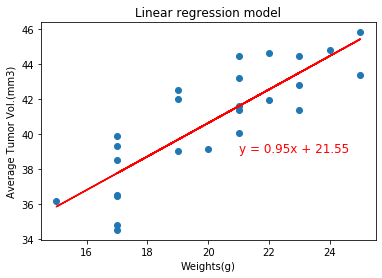

In [203]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
regress_values = x_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(21,39),fontsize=12,color="red")
plt.xlabel("Weights(g)")
plt.ylabel("Average Tumor Vol.(mm3)")
plt.title("Linear regression model")